In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Load the data into pandas and select the data I'm interested in

In [2]:
airport_file="resources/airports.csv"
airline_file="resources/airlines.csv"
flight_file="resources/flights.csv"

In [3]:
airport_pd=pd.read_csv(airport_file)
airport_pd

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [4]:
airline_pd=pd.read_csv(airline_file)
airline_pd

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [5]:
flight_pd=pd.read_csv(flight_file)
flight_pd.head()

C:\Users\jchaf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
flight_pd.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [7]:
#Find only january flights
jan_flight_pd=flight_pd.loc[flight_pd["MONTH"] == 1]
jan_flight_pd

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,2015,1,31,6,B6,839,N658JB,JFK,BQN,2359,...,419.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
469964,2015,1,31,6,DL,1887,N855NW,SEA,DTW,2359,...,658.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
469965,2015,1,31,6,F9,300,N218FR,DEN,TPA,2359,...,534.0,23.0,0,0,NaN,21.0,0.0,2.0,0.0,0.0
469966,2015,1,31,6,F9,422,N954FR,DEN,ATL,2359,...,510.0,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0


# Filter The flight types in to Cancelled, Diverted, and Successful Flights

In [8]:
#Find only flights that were cancelled in January
jan_cancelled=jan_flight_pd.loc[jan_flight_pd["CANCELLED"] == 1]
jan_cancelled.reset_index(drop=True, inplace=True)
jan_cancelled.to_csv("jan_cancellled.csv",index=False)
jan_cancelled

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11977,2015,1,31,6,EV,2526,N902EV,DFW,LAW,2145,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
11978,2015,1,31,6,MQ,3139,N663MQ,ORD,DBQ,2150,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
11979,2015,1,31,6,AS,70,N706AS,JNU,SIT,2220,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
11980,2015,1,31,6,OO,6268,N579SW,SFO,FAT,2230,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [9]:
#Find only flights that were diverted in January
jan_diverted=jan_flight_pd.loc[jan_flight_pd["DIVERTED"] == 1]
jan_diverted.reset_index(drop = True, inplace=True)
jan_diverted.to_csv("jan_diverted.csv",index=False)
jan_diverted

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,716,N944DL,OMA,ATL,645,...,1451.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,OO,5237,N712SK,MKE,IAH,745,...,1505.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,1966,N685SW,ATL,JAX,845,...,1219.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4555,N12552,IAH,HRL,902,...,1319.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,WN,1081,N214WN,MDW,OKC,930,...,1343.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2015,1,31,6,US,697,N207UW,LIH,PHX,2300,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
969,2015,1,31,6,US,693,N908AW,HNL,PHX,2315,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
970,2015,1,31,6,US,645,N910AW,OGG,PHX,2330,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
971,2015,1,31,6,US,664,N902AW,KOA,PHX,2345,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Find flights that were not diverted or cancelled
jan_successfull=jan_flight_pd.loc[((jan_flight_pd["DIVERTED"] != 1) & (jan_flight_pd["CANCELLED"] != 1))]
jan_successfull.reset_index(drop = True, inplace=True)
jan_successfull.to_csv("jan_successful.csv",index=False)
jan_successfull

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457008,2015,1,31,6,B6,839,N658JB,JFK,BQN,2359,...,419.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
457009,2015,1,31,6,DL,1887,N855NW,SEA,DTW,2359,...,658.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
457010,2015,1,31,6,F9,300,N218FR,DEN,TPA,2359,...,534.0,23.0,0,0,NaN,21.0,0.0,2.0,0.0,0.0
457011,2015,1,31,6,F9,422,N954FR,DEN,ATL,2359,...,510.0,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0


# Create New Tables not given by source

In [11]:
day_of_week=[[1,"Monday"],\
             [2,"Tuesday"],\
             [3,"Wednesday"],\
             [4,"Thursday"],\
             [5,"Friday"],\
             [6,"Saturday"],\
             [7,"Sunday"]]
dow_df=pd.DataFrame(day_of_week,columns=['PK_index','day'])
dow_df

,PK_index,day
0,1,Monday
1,2,Tuesday
2,3,Wednesday
3,4,Thursday
4,5,Friday
5,6,Saturday
6,7,Sunday


In [12]:
cancel_reason=[['A','Carrier'],\
               ['B','Weather'],\
               ['C','National Air System'],\
               ['D','Security']]
cancel_df=pd.DataFrame(cancel_reason, columns=["PK_cancellation_code","cancellation_reason"])

cancel_df

,PK_cancellation_code,cancellation_reason
0,A,Carrier
1,B,Weather
2,C,National Air System
3,D,Security


# Remove unnecessary columns and rename remaining

In [13]:
new_cancelled = jan_cancelled[['FLIGHT_NUMBER',\
                               "YEAR",\
                               "MONTH",\
                               "DAY",\
                               'TAIL_NUMBER',\
                               'SCHEDULED_DEPARTURE',\
                               'DAY_OF_WEEK',\
                               'ORIGIN_AIRPORT',\
                               'DESTINATION_AIRPORT',\
                               'AIRLINE',\
                               'CANCELLATION_REASON']]

new_cancelled= new_cancelled.rename(columns={'FLIGHT_NUMBER':'flight_number',\
                                             "YEAR":'year',\
                                             "MONTH":'month',\
                                             "DAY":'day',\
                                             'TAIL_NUMBER':'tail_number',\
                                             'SCHEDULED_DEPARTURE':'departure_time',\
                                             'DAY_OF_WEEK':'FK_dow',\
                                             'ORIGIN_AIRPORT':'FK_origin',\
                                             'DESTINATION_AIRPORT':'FK_destination',\
                                             'AIRLINE':'FK_airline',
                                             'CANCELLATION_REASON':'FK_cancellation_code'})
new_cancelled

,flight_number,year,month,day,tail_number,departure_time,FK_dow,FK_origin,FK_destination,FK_airline,FK_cancellation_code
0,136,2015,1,1,N431AS,135,4,ANC,SEA,AS,A
1,2459,2015,1,1,N3BDAA,200,4,PHX,DFW,AA,B
2,5254,2015,1,1,N746SK,510,4,MAF,IAH,OO,B
3,2859,2015,1,1,N660MQ,525,4,SGF,DFW,MQ,B
4,5460,2015,1,1,N583SW,530,4,RDD,SFO,OO,A
...,...,...,...,...,...,...,...,...,...,...,...
11977,2526,2015,1,31,N902EV,2145,6,DFW,LAW,EV,A
11978,3139,2015,1,31,N663MQ,2150,6,ORD,DBQ,MQ,B
11979,70,2015,1,31,N706AS,2220,6,JNU,SIT,AS,A
11980,6268,2015,1,31,N579SW,2230,6,SFO,FAT,OO,A


In [14]:
new_diverted = jan_diverted[['FLIGHT_NUMBER',\
                               "YEAR",\
                               "MONTH",\
                               "DAY",\
                               'TAIL_NUMBER',\
                               'SCHEDULED_DEPARTURE',\
                               'DAY_OF_WEEK',\
                               'ORIGIN_AIRPORT',\
                               'DESTINATION_AIRPORT',\
                               'AIRLINE']]

new_diverted=new_diverted.rename(columns={'FLIGHT_NUMBER':'flight_number',\
                                             "YEAR":'year',\
                                             "MONTH":'month',\
                                             "DAY":'day',\
                                             'TAIL_NUMBER':'tail_number',\
                                             'SCHEDULED_DEPARTURE':'departure_time',\
                                             'DAY_OF_WEEK':'FK_dow',\
                                             'ORIGIN_AIRPORT':'FK_origin',\
                                             'DESTINATION_AIRPORT':'FK_destination',\
                                             'AIRLINE':'FK_airline'})
new_diverted

,flight_number,year,month,day,tail_number,departure_time,FK_dow,FK_origin,FK_destination,FK_airline
0,716,2015,1,1,N944DL,645,4,OMA,ATL,DL
1,5237,2015,1,1,N712SK,745,4,MKE,IAH,OO
2,1966,2015,1,1,N685SW,845,4,ATL,JAX,WN
3,4555,2015,1,1,N12552,902,4,IAH,HRL,EV
4,1081,2015,1,1,N214WN,930,4,MDW,OKC,WN
...,...,...,...,...,...,...,...,...,...,...
968,697,2015,1,31,N207UW,2300,6,LIH,PHX,US
969,693,2015,1,31,N908AW,2315,6,HNL,PHX,US
970,645,2015,1,31,N910AW,2330,6,OGG,PHX,US
971,664,2015,1,31,N902AW,2345,6,KOA,PHX,US


In [15]:
new_successful=jan_successfull[['FLIGHT_NUMBER',\
                               "YEAR",\
                               "MONTH",\
                               "DAY",\
                               'TAIL_NUMBER',\
                               'SCHEDULED_DEPARTURE',\
                               'DAY_OF_WEEK',\
                               'ORIGIN_AIRPORT',\
                               'DESTINATION_AIRPORT',\
                               'AIRLINE']]

new_successful=new_successful.rename(columns={'FLIGHT_NUMBER':'flight_number',\
                                             "YEAR":'year',\
                                             "MONTH":'month',\
                                             "DAY":'day',\
                                             'TAIL_NUMBER':'tail_number',\
                                             'SCHEDULED_DEPARTURE':'departure_time',\
                                             'DAY_OF_WEEK':'FK_dow',\
                                             'ORIGIN_AIRPORT':'FK_origin',\
                                             'DESTINATION_AIRPORT':'FK_destination',\
                                             'AIRLINE':'FK_airline'})
new_successful

,flight_number,year,month,day,tail_number,departure_time,FK_dow,FK_origin,FK_destination,FK_airline
0,98,2015,1,1,N407AS,5,4,ANC,SEA,AS
1,2336,2015,1,1,N3KUAA,10,4,LAX,PBI,AA
2,840,2015,1,1,N171US,20,4,SFO,CLT,US
3,258,2015,1,1,N3HYAA,20,4,LAX,MIA,AA
4,135,2015,1,1,N527AS,25,4,SEA,ANC,AS
...,...,...,...,...,...,...,...,...,...,...
457008,839,2015,1,31,N658JB,2359,6,JFK,BQN,B6
457009,1887,2015,1,31,N855NW,2359,6,SEA,DTW,DL
457010,300,2015,1,31,N218FR,2359,6,DEN,TPA,F9
457011,422,2015,1,31,N954FR,2359,6,DEN,ATL,F9


In [16]:
new_airport= airport_pd[['IATA_CODE',\
                         'AIRPORT',\
                         'CITY',\
                         'STATE']]
new_airport = new_airport.rename(columns={'IATA_CODE':'PK_IATA_code',\
                                          'AIRPORT':'name',\
                                          'CITY':'city',\
                                          'STATE':'state'})
new_airport

,PK_IATA_code,name,city,state
0,ABE,Lehigh Valley International Airport,Allentown,PA
1,ABI,Abilene Regional Airport,Abilene,TX
2,ABQ,Albuquerque International Sunport,Albuquerque,NM
3,ABR,Aberdeen Regional Airport,Aberdeen,SD
4,ABY,Southwest Georgia Regional Airport,Albany,GA
...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK
318,WYS,Westerly State Airport,West Yellowstone,MT
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR
320,YAK,Yakutat Airport,Yakutat,AK


In [17]:
new_airlines=airline_pd.rename(columns={"IATA_CODE":"PK_IATA_code",\
                                        "AIRLINE":"airline_name"})
new_airlines

,PK_IATA_code,airline_name
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


# Create database connection

In [18]:
from config import pswd
connection_string = f"postgres:{pswd}@localhost:5432/flights_db"
engine = create_engine(f'postgresql://{connection_string}')

In [19]:
engine.table_names()

['day_of_the_week',
 'successful_flights',
 'airports',
 'airlines',
 'cancelled_flights',
 'cancellation_reason',
 'diverted_flights']

# Load DataFrames into Database

In [20]:
cancel_df.to_sql(name='cancellation_reason',con=engine,if_exists='append',index=False)

In [21]:
dow_df.to_sql(name='day_of_the_week', con=engine, if_exists='append',index=False)

In [22]:
new_airlines.to_sql(name='airlines', con=engine, if_exists='append',index=False)

In [23]:
new_airport.to_sql(name='airports', con=engine, if_exists='append',index=False)

In [24]:
new_successful.to_sql(name='successful_flights', con=engine, if_exists='append',index=True,index_label="PK_index")

In [25]:
new_cancelled.to_sql(name='cancelled_flights', con=engine, if_exists='append',index=True,index_label="PK_index")

In [26]:
new_diverted.to_sql(name='diverted_flights', con=engine, if_exists='append',index=True,index_label="PK_index")

# Test upload

In [27]:
pd.read_sql_query('select * from airports', con=engine).head()

,PK_IATA_code,name,city,state
0,ABE,Lehigh Valley International Airport,Allentown,PA
1,ABI,Abilene Regional Airport,Abilene,TX
2,ABQ,Albuquerque International Sunport,Albuquerque,NM
3,ABR,Aberdeen Regional Airport,Aberdeen,SD
4,ABY,Southwest Georgia Regional Airport,Albany,GA


In [28]:
pd.read_sql_query('select * from successful_flights LIMIT 5', con=engine).head()

,PK_index,flight_number,year,month,day,departure_time,tail_number,FK_dow,FK_origin,FK_destination,FK_airline
0,0,98,2015,1,1,5,N407AS,4,ANC,SEA,AS
1,1,2336,2015,1,1,10,N3KUAA,4,LAX,PBI,AA
2,2,840,2015,1,1,20,N171US,4,SFO,CLT,US
3,3,258,2015,1,1,20,N3HYAA,4,LAX,MIA,AA
4,4,135,2015,1,1,25,N527AS,4,SEA,ANC,AS


In [29]:
pd.read_sql_query('select * from cancelled_flights', con=engine).head()

,PK_index,flight_number,year,month,day,departure_time,tail_number,FK_dow,FK_origin,FK_destination,FK_airline,FK_cancellation_code
0,0,136,2015,1,1,135,N431AS,4,ANC,SEA,AS,A
1,1,2459,2015,1,1,200,N3BDAA,4,PHX,DFW,AA,B
2,2,5254,2015,1,1,510,N746SK,4,MAF,IAH,OO,B
3,3,2859,2015,1,1,525,N660MQ,4,SGF,DFW,MQ,B
4,4,5460,2015,1,1,530,N583SW,4,RDD,SFO,OO,A


In [30]:
pd.read_sql_query('select * from diverted_flights', con=engine).head()

,PK_index,flight_number,year,month,day,departure_time,tail_number,FK_dow,FK_origin,FK_destination,FK_airline
0,0,716,2015,1,1,645,N944DL,4,OMA,ATL,DL
1,1,5237,2015,1,1,745,N712SK,4,MKE,IAH,OO
2,2,1966,2015,1,1,845,N685SW,4,ATL,JAX,WN
3,3,4555,2015,1,1,902,N12552,4,IAH,HRL,EV
4,4,1081,2015,1,1,930,N214WN,4,MDW,OKC,WN


# Quick Analysis

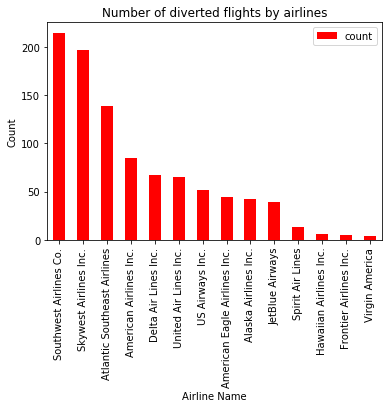

In [31]:
diverted_by_airline=pd.read_sql_query(\
    'SELECT "airline_name", count("FK_airline") From diverted_flights AS df\
     join airlines AS a ON a."PK_IATA_code" = df."FK_airline"\
     group by "airline_name"\
     order by count("FK_airline") DESC;', con=engine)
diverted_by_airline.plot(kind="bar", x='airline_name', y='count', facecolor="red")
plt.xlabel("Airline Name")
plt.ylabel("Count")
plt.title("Number of diverted flights by airlines")

plt.savefig(f"./images/divAir.png")

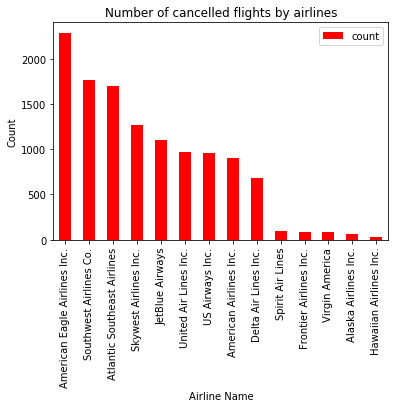

In [32]:
cancelled_by_airline=pd.read_sql_query(\
    'SELECT "airline_name", count("FK_airline") From cancelled_flights AS cf\
     join airlines AS a ON a."PK_IATA_code" = cf."FK_airline"\
     group by "airline_name"\
     order by count("FK_airline") DESC;', con=engine)

cancelled_by_airline.plot(kind="bar", x='airline_name', y='count', facecolor="red")
plt.xlabel("Airline Name")
plt.ylabel("Count")
plt.title("Number of cancelled flights by airlines")

plt.savefig(f"./images/canAir.png")

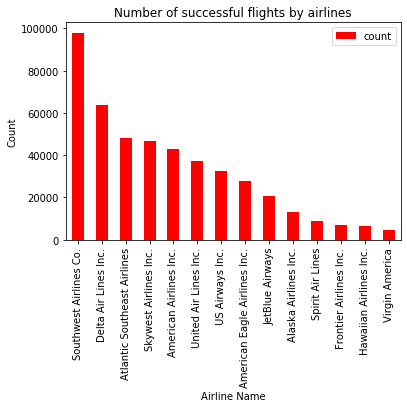

In [33]:
success_by_airline=pd.read_sql_query(\
    'SELECT "airline_name", count("FK_airline") From successful_flights AS sf\
     join airlines AS a ON a."PK_IATA_code" = sf."FK_airline"\
     group by "airline_name"\
     order by count("FK_airline") DESC;', con=engine)

success_by_airline.plot(kind="bar", x='airline_name', y='count', facecolor="red")
plt.xlabel("Airline Name")
plt.ylabel("Count")
plt.title("Number of successful flights by airlines")

plt.savefig(f"./images/sucAir.png")

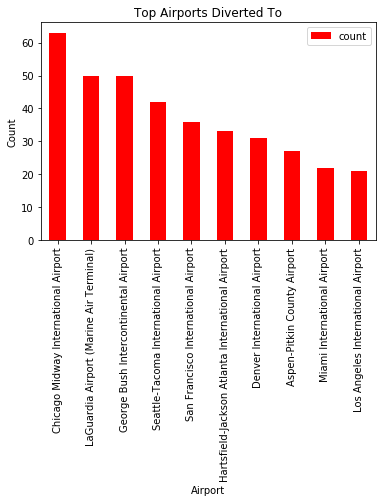

In [34]:
diverted_to_airport=pd.read_sql_query(\
    'select a."name", count(df."FK_destination") from diverted_flights as df\
    join airports as a ON a."PK_IATA_code" = df."FK_destination" \
    group by a."name"\
    order by count(df."FK_destination")\
    DESC LIMIT 10', con=engine)
diverted_to_airport.plot(kind="bar", x='name', y='count', facecolor="red")
plt.ylabel("Count")
plt.xlabel("Airport")
plt.title("Top Airports Diverted To")
plt.savefig(f"./images/divAirport.png")

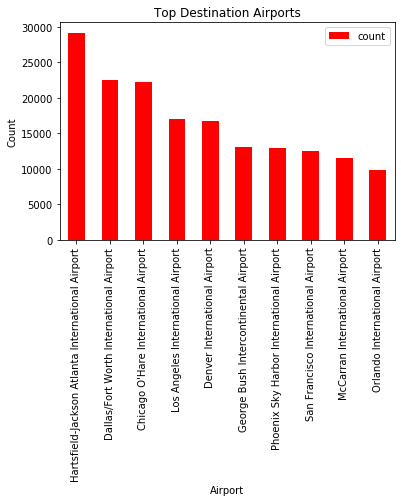

In [35]:
top_dest_airport=pd.read_sql_query(\
    'select a."name", count(sf."FK_destination") from successful_flights as sf\
    join airports as a ON a."PK_IATA_code" = sf."FK_destination" \
    group by a."name"\
    order by count(sf."FK_destination")\
    DESC LIMIT 10', con=engine)
top_dest_airport.plot(kind="bar", x='name', y='count', facecolor="red")
plt.ylabel("Count")
plt.xlabel("Airport")
plt.title("Top Destination Airports")
plt.savefig(f"./images/topAirports.png")

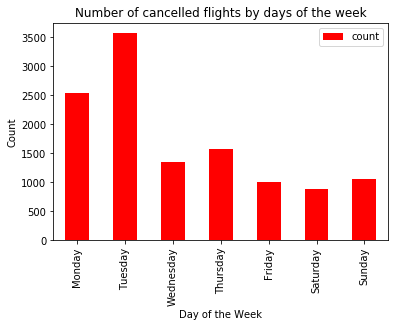

In [40]:
cancelled_by_day=pd.read_sql_query('select d."day", count("FK_dow") from cancelled_flights as cf\
                                        join day_of_the_week as d on d."PK_index"=cf."FK_dow"\
                                        group by d."day"\
                                        order by avg("FK_dow")', con=engine)
cancelled_by_day.plot(kind="bar", x='day', y='count', facecolor="red")
plt.ylabel("Count")
plt.xlabel("Day of the Week")
plt.title("Number of cancelled flights by days of the week")
plt.savefig(f"./images/canWeek.png")

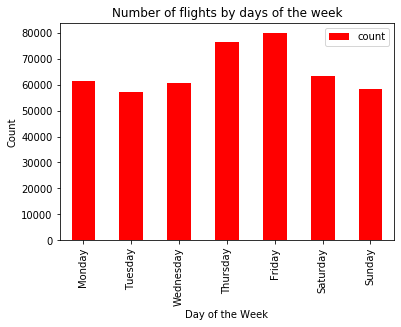

In [37]:
success_by_day=pd.read_sql_query('select d."day", count("FK_dow") from successful_flights as sf\
                                        join day_of_the_week as d on d."PK_index"=sf."FK_dow"\
                                        group by d."day"\
                                        order by avg("FK_dow")', con=engine)
success_by_day.plot(kind="bar", x='day', y='count', facecolor="red")
plt.ylabel("Count")
plt.xlabel("Day of the Week")
plt.title("Number of flights by days of the week")
plt.savefig(f"./images/topWeek.png")

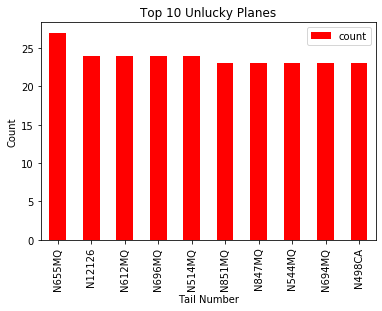

In [38]:
cancelled_by_airline=pd.read_sql_query('select tail_number, count(tail_number) from cancelled_flights group by tail_number\
                                        order by count(tail_number) DESC\
                                        Limit 10', con=engine)
cancelled_by_airline.plot(kind="bar", x='tail_number', y='count', facecolor="red")
plt.ylabel("Count")
plt.xlabel("Tail Number")
plt.title("Top 10 Unlucky Planes")
plt.savefig(f"./images/Unluck.png")

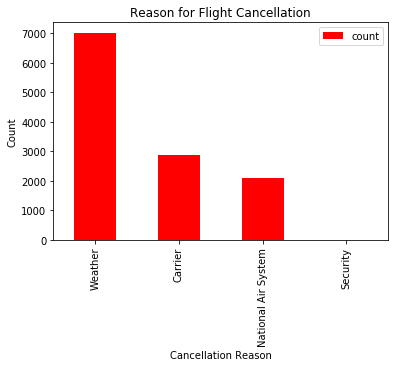

In [39]:
cancelled_by_reason=pd.read_sql_query(\
                    'select c.cancellation_reason, count("FK_cancellation_code") from cancelled_flights as cf\
                    join cancellation_reason as c on c."PK_cancellation_code"=cf."FK_cancellation_code"\
                    group by c."PK_cancellation_code"\
                    order by count("FK_cancellation_code") DESC', con=engine)
cancelled_by_reason.plot(kind="bar", x='cancellation_reason', y='count', facecolor="red")
plt.ylabel("Count")
plt.xlabel("Cancellation Reason")
plt.title("Reason for Flight Cancellation")
plt.savefig(f"./images/canReason.png")